In [1]:
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0


In [2]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import gdown

In [3]:
!gdown 1icirHC23uHySxk_7CQq_ggeevmxuqB7L
!gdown 1uJc_NJ6WOTBj-zqNbHRbGgMffcx8nRg-
!gdown 1YDntdBBDpW6ytPKsOiYO57AxDOp_Bvlm
!gdown 1HLSzXtPM0E4ar11rjYoAblhPXP0rlJWe
!gdown 1sQIAKA3Ys1jvuooNJBtHtcpEYPoL_bsy
!gdown 1jFLbAuI4WJU1Jm8nM5Dx4qV9RsxyefC8


Downloading...
From: https://drive.google.com/uc?id=1icirHC23uHySxk_7CQq_ggeevmxuqB7L
To: /content/2022_eShop.csv
100% 69.3M/69.3M [00:02<00:00, 28.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uJc_NJ6WOTBj-zqNbHRbGgMffcx8nRg-
To: /content/2024_non-eShop.csv
100% 52.0M/52.0M [00:01<00:00, 32.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1YDntdBBDpW6ytPKsOiYO57AxDOp_Bvlm
From (redirected): https://drive.google.com/uc?id=1YDntdBBDpW6ytPKsOiYO57AxDOp_Bvlm&confirm=t&uuid=746473e3-ead3-4ebe-856d-08ca86596dca
To: /content/2022_non-eShop.csv
100% 123M/123M [00:04<00:00, 25.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1HLSzXtPM0E4ar11rjYoAblhPXP0rlJWe
From (redirected): https://drive.google.com/uc?id=1HLSzXtPM0E4ar11rjYoAblhPXP0rlJWe&confirm=t&uuid=13ea920a-c36f-4964-be8b-c6ecd9b753a6
To: /content/2023_non-eShop.csv
100% 148M/148M [00:06<00:00, 24.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1sQIAKA3Ys1jvuooNJBtHtcpEY

In [4]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Loading
# Define a dictionary with column names and their corresponding data types
column_data_types = {
    'order_date': 'str',
    'order_number': 'int',
    'material_number': 'str',
    'order_material_net_value': 'float',
    'sales_channel': 'str',
    'PRH1': 'str',
    'PRH4': 'str',
    'customer_group': 'str',
    'customer_number': 'str',
    'region': 'str',
    'DSO_Ind': 'str'
}

# Load data with specified data types
eshop_2022 = pd.read_csv(r'/content/2022_eShop.csv', dtype=column_data_types)
eshop_2023 = pd.read_csv(r'/content/2023_eShop.csv', dtype=column_data_types)
eshop_2024 = pd.read_csv(r'/content/2024_eShop.csv', dtype=column_data_types)
non_eshop_2022 = pd.read_csv(r'/content/2022_non-eShop.csv', dtype=column_data_types)
non_eshop_2023 = pd.read_csv(r'/content/2023_non-eShop.csv', dtype=column_data_types)
non_eshop_2024 = pd.read_csv(r'/content/2024_non-eShop.csv', dtype=column_data_types)


In [5]:
# Step 2: Data Integration (Concatenation)
eshop = pd.concat([eshop_2022, eshop_2023, eshop_2024], ignore_index=True)
non_eshop = pd.concat([non_eshop_2022, non_eshop_2023, non_eshop_2024], ignore_index=True)


In [6]:

# Concatenate eShop and non-eShop dataframes into one
all_data = pd.concat([eshop, non_eshop], ignore_index=True)

In [7]:

# Sort by 'order_date' in ascending order, then by 'customer number'
all_data_sorted = all_data.sort_values(by=[ 'customer_number', 'order_date'], ascending=True, inplace=False)

# Display the first few rows
print(all_data_sorted.head())

# Display the last few rows
print(all_data_sorted.tail())



        order_date  order_number material_number  order_material_net_value  \
358285  2022-01-12     111804810       022.0132S                     217.5   
446035  2022-01-28     111854082        024.2371                     235.5   
171487  2022-02-14     111896520       048.188V4                      50.0   
213090  2022-02-14     111896520        022.4504                     167.0   
390777  2022-02-14     111896520        022.4503                     334.0   

       sales_channel                   PRH1                         PRH4  \
358285         eShop  Restorative Solutions               Abutments, SRA   
446035         eShop  Restorative Solutions            Other Prosthetics   
171487         eShop  Restorative Solutions  Other Restorative Solutions   
213090         eShop  Restorative Solutions        Abutments, Edentulous   
390777         eShop  Restorative Solutions        Abutments, Edentulous   

         customer_group       customer_number region  DSO_Ind  
358285  Ge

In [8]:
# Check for missing values
print(all_data_sorted.isnull().sum())

order_date                        0
order_number                      0
material_number                   0
order_material_net_value          0
sales_channel                     0
PRH1                              0
PRH4                            219
customer_group                21563
customer_number                   0
region                      1504522
DSO_Ind                           0
dtype: int64


In [9]:
# Replace null values with 'n/a'
all_data_sorted_filled = all_data_sorted.fillna('n/a')

# Check if null values are replaced
print(all_data_sorted_filled.isnull().sum())


order_date                  0
order_number                0
material_number             0
order_material_net_value    0
sales_channel               0
PRH1                        0
PRH4                        0
customer_group              0
customer_number             0
region                      0
DSO_Ind                     0
dtype: int64


In [10]:
# Step 5: Check for duplicate rows
duplicates = all_data_sorted_filled.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Optionally, remove duplicate rows
all_data_sorted_filled = all_data_sorted_filled.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(all_data_sorted_filled)}")


Number of duplicate rows: 0
Number of rows after removing duplicates: 3167194


In [11]:
# Data Understanding
print(all_data_sorted_filled.info())  # Display information about the dataset
print(all_data_sorted_filled.describe())  # Summary statistics for numerical columns


<class 'pandas.core.frame.DataFrame'>
Index: 3167194 entries, 358285 to 3121603
Data columns (total 11 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   order_date                object 
 1   order_number              int64  
 2   material_number           object 
 3   order_material_net_value  float64
 4   sales_channel             object 
 5   PRH1                      object 
 6   PRH4                      object 
 7   customer_group            object 
 8   customer_number           object 
 9   region                    object 
 10  DSO_Ind                   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 290.0+ MB
None
       order_number  order_material_net_value
count  3.167194e+06              3.167194e+06
mean   1.994159e+09              4.188962e+02
std    1.392496e+09              9.907860e+02
min    1.117802e+08             -1.251000e+01
25%    1.133769e+08              7.389000e+01
50%    3.022276e+09              1.

In [12]:
# Step 8: Check date format consistency
# Ensure 'order_date' is in a consistent date format
all_data_sorted_filled['order_date'] = pd.to_datetime(all_data_sorted_filled['order_date'], errors='coerce')
print("Check for invalid date formats (NaT values):")

Check for invalid date formats (NaT values):


In [13]:
import pandas as pd
from tabulate import tabulate

# Display the head of the DataFrame with styling
styled_table = (all_data_sorted_filled.head()
                .style
                .set_table_styles(
                    [{'selector': 'thead th',
                      'props': [('background-color', '#f7f7f9'),
                                ('color', '#333'),
                                ('border-bottom', '1px solid #ddd'),
                                ('font-family', 'Arial, sans-serif')]},
                     {'selector': 'tbody td',
                      'props': [('padding', '8px'),
                                ('border-bottom', '1px solid #ddd'),
                                ('font-family', 'Arial, sans-serif')]},
                     {'selector': 'tbody tr:hover',
                      'props': [('background-color', '#f1f1f1')]}])
                .set_caption('Table: Sample DataFrame Head'))

styled_table


,order_date,order_number,material_number,order_material_net_value,sales_channel,PRH1,PRH4,customer_group,customer_number,region,DSO_Ind
358285,2022-01-12 00:00:00,111804810,022.0132S,217.500000,eShop,Restorative Solutions,"Abutments, SRA",General dentist,30303430353030313430,n/a,Non-DSO
446035,2022-01-28 00:00:00,111854082,024.2371,235.500000,eShop,Restorative Solutions,Other Prosthetics,General dentist,30303430353030313430,n/a,Non-DSO
171487,2022-02-14 00:00:00,111896520,048.188V4,50.000000,eShop,Restorative Solutions,Other Restorative Solutions,General dentist,30303430353030313430,n/a,Non-DSO
213090,2022-02-14 00:00:00,111896520,022.4504,167.000000,eShop,Restorative Solutions,"Abutments, Edentulous",General dentist,30303430353030313430,n/a,Non-DSO
390777,2022-02-14 00:00:00,111896520,022.4503,334.000000,eShop,Restorative Solutions,"Abutments, Edentulous",General dentist,30303430353030313430,n/a,Non-DSO


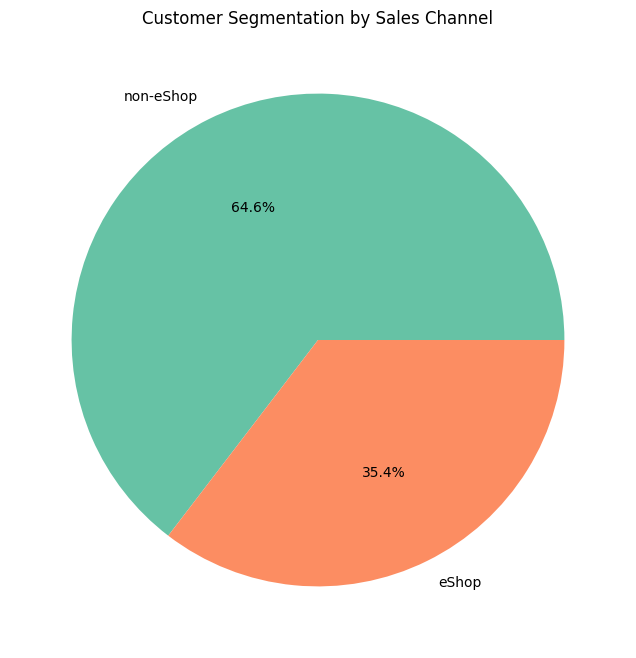

In [14]:
# Visualize customer segmentation based on sales channel
# Calculate the count of customers per sales channel
sales_channel_counts = all_data_sorted_filled['sales_channel'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_channel_counts, labels=sales_channel_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Customer Segmentation by Sales Channel')
plt.show()

Recency Analysis:
Average days since last purchase: 411.65796537881795


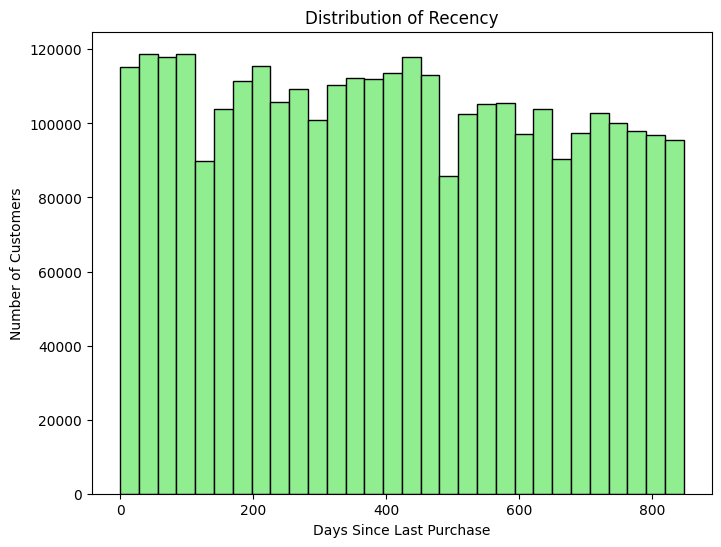


Frequency Analysis:
Average purchase frequency per year: 14.885386236465374


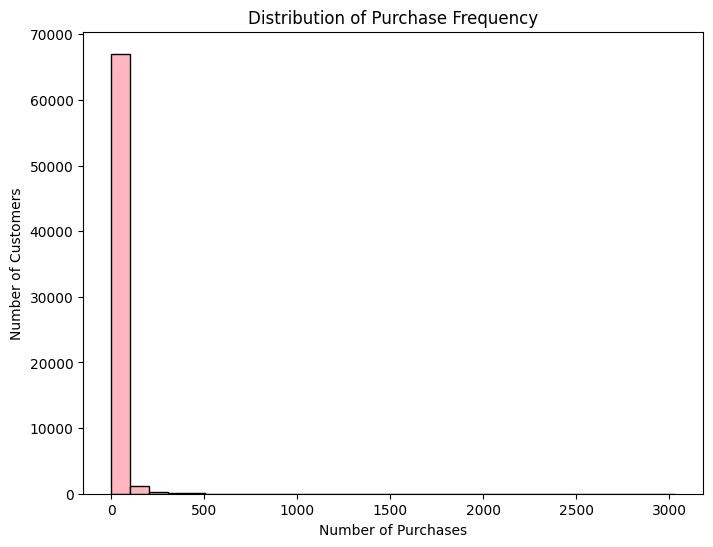


Monetary Value Analysis:
Average order value: 418.89617140914027


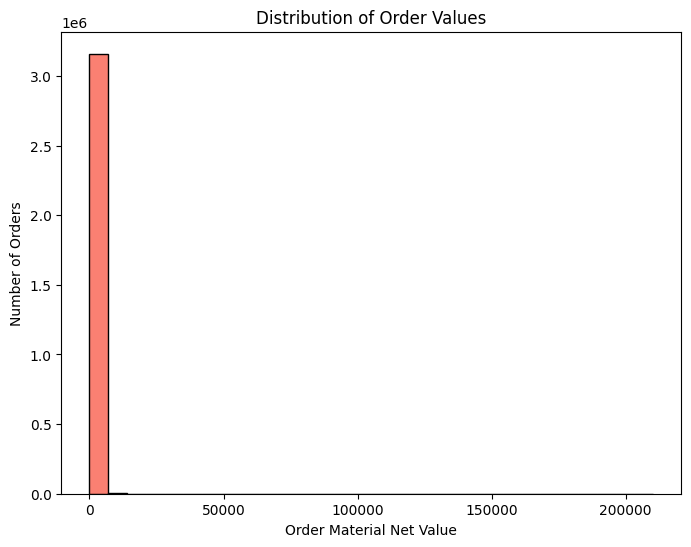

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Convert 'order_date' to datetime format
all_data_sorted_filled['order_date'] = pd.to_datetime(all_data_sorted_filled['order_date'])

# Calculate recency
max_order_date = all_data_sorted_filled['order_date'].max()
all_data_sorted_filled['Recency'] = (max_order_date - all_data_sorted_filled['order_date']).dt.days

# Recency Analysis
print("Recency Analysis:")
print(f"Average days since last purchase: {all_data_sorted_filled['Recency'].mean()}")  # Average days since last purchase

# Plot Recency
plt.figure(figsize=(8, 6))
plt.hist(all_data_sorted_filled['Recency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.title('Distribution of Recency')
plt.show()

# Frequency Analysis
print("\nFrequency Analysis:")
# Calculate frequency based on the count of unique order numbers per customer over the entire duration of the dataset
frequency_per_customer = all_data_sorted_filled.groupby('customer_number')['order_number'].nunique()
print(f"Average purchase frequency per year: {frequency_per_customer.mean()}")  # Average purchase frequency per year

# Plot Frequency
plt.figure(figsize=(8, 6))
plt.hist(frequency_per_customer, bins=30, color='lightpink', edgecolor='black')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.title('Distribution of Purchase Frequency')
plt.show()

# Monetary Value Analysis
print("\nMonetary Value Analysis:")
print(f"Average order value: {all_data_sorted_filled['order_material_net_value'].mean()}")  # Average order value

# Plot Monetary Value
plt.figure(figsize=(8, 6))
plt.hist(all_data_sorted_filled['order_material_net_value'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Order Material Net Value')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Values')
plt.show()


In [16]:
import pandas as pd
from datetime import datetime
# Calculate the time difference between the first and last order for each customer
def calculate_customer_tenure(data):
  data['order_date'] = pd.to_datetime(data['order_date'])  # Ensure order_date is datetime
  customer_tenure = data.groupby('customer_number')['order_date'].max() - data.groupby('customer_number')['order_date'].min()
  customer_tenure = customer_tenure.dt.days / 365  # Convert to years (assuming 365 days in a year)
  return customer_tenure

# Calculate Average Order Value per Customer
def calculate_avg_order_value(data):
  average_order_value = data.groupby('customer_number')['order_material_net_value'].mean()
  return average_order_value

# Calculate Customer Lifetime Value (CLV)
def calculate_clv(data, discount_rate=0.1):  # You can adjust the discount rate as needed
  customer_tenure = calculate_customer_tenure(data.copy())
  average_order_value = calculate_avg_order_value(data.copy())
  clv = (average_order_value * customer_tenure) / (1 + discount_rate)
  clv = clv.to_frame(name='CLV').reset_index()
  return clv

# Apply the functions
customer_lifetime_value = calculate_clv(all_data_sorted_filled.copy())

# Print or analyze the CLV data (e.g., average CLV, distribution of CLV)
print(customer_lifetime_value.head())  # View the first few rows of the CLV data


        customer_number          CLV
0  30303430353030313430   474.808791
1  30303430353030313630  1474.364240
2  30303430353030313631   136.241574
3  30303430353030313633   430.115537
4  30303430353030313732   907.113699


In [17]:
# Sort the DataFrame by the 'CLV' column in descending order
customer_lifetime_value_sorted = customer_lifetime_value.sort_values(by='CLV', ascending=False).reset_index(drop=True)


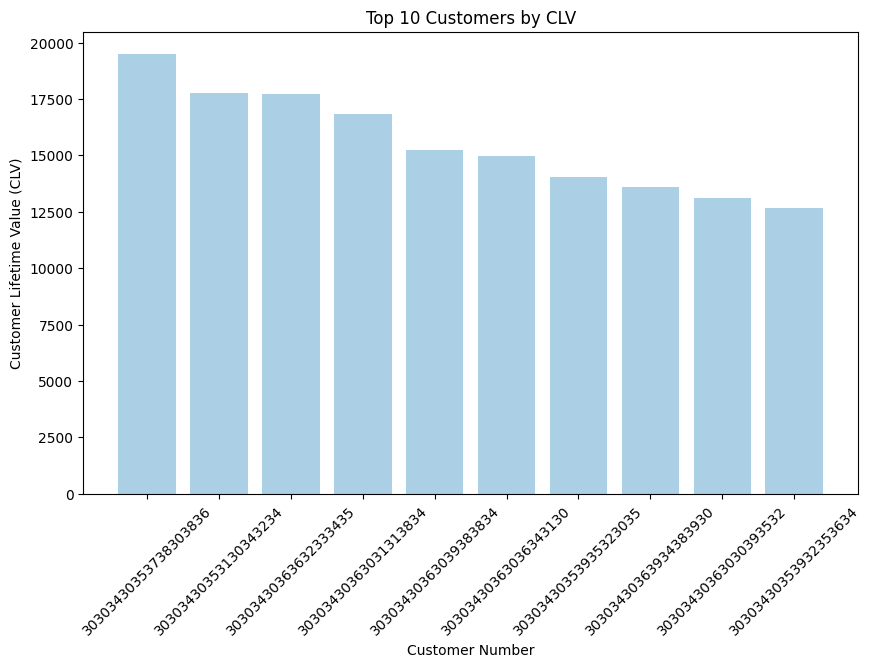

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette with multiple shades of salmon
palette = sns.color_palette("Blues_d", len(customer_lifetime_value_sorted))

# Plot CLV values with multiple shades of salmon color
plt.figure(figsize=(10, 6))
plt.bar(customer_lifetime_value_sorted['customer_number'][:10], customer_lifetime_value_sorted['CLV'][:10], color=palette)
plt.xlabel('Customer Number')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.title('Top 10 Customers by CLV')
plt.xticks(rotation=45)
plt.show()


        customer_number  Recency  Frequency   Monetary R_Score F_Score  \
0  30303430353030313430       39         20    8839.00       3       4   
1  30303430353030313630        4        175  527123.83       4       4   
2  30303430353030313631        9         33    4954.80       4       4   
3  30303430353030313633        2        202   65503.63       4       4   
4  30303430353030313732        4        206  298302.18       4       4   

  M_Score RFM_Score    Customer_Segment  
0       4       344  Potential Revivals  
1       4       444           Champions  
2       3       443     Needs Nurturing  
3       4       444           Champions  
4       4       444           Champions  
              Segment  Count
0       Low Potential  49687
1           Champions   8969
2  Potential Revivals   8232
3     Needs Nurturing   1917


<ipython-input-19-6a9392388a90>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer_Segment', data=rfm, palette='Blues_d', order=segment_distribution['Segment'])


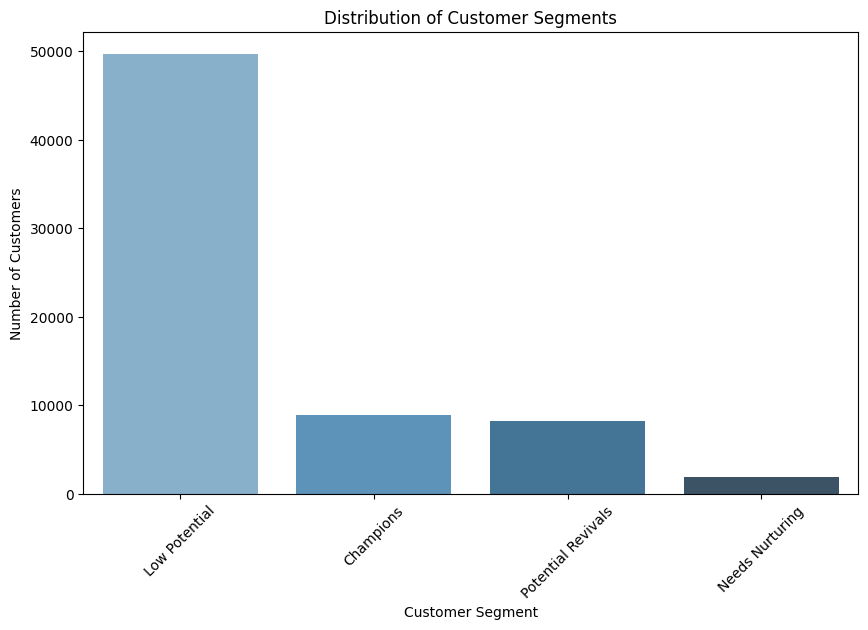


First few rows of segment: Potential Revivals
         customer_number  Recency  Frequency   Monetary R_Score F_Score  \
0   30303430353030313430       39         20    8839.00       3       4   
5   30303430353030313738       96         24   25501.00       3       4   
11  30303430353030323032      613         68  152891.28       1       4   
32  30303430353030323635      341          6   10683.88       2       3   
33  30303430353030323636       66         23   10316.59       3       4   

   M_Score RFM_Score    Customer_Segment  
0        4       344  Potential Revivals  
5        4       344  Potential Revivals  
11       4       144  Potential Revivals  
32       4       234  Potential Revivals  
33       4       344  Potential Revivals  

First few rows of segment: Champions
        customer_number  Recency  Frequency   Monetary R_Score F_Score  \
1  30303430353030313630        4        175  527123.83       4       4   
3  30303430353030313633        2        202   65503.63    

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate Recency, Frequency, and Monetary value
max_order_date = all_data_sorted_filled['order_date'].max()
rfm = all_data_sorted_filled.groupby('customer_number').agg({
    'order_date': lambda x: (max_order_date - x.max()).days,
    'order_number': 'nunique',
    'order_material_net_value': 'sum'
}).reset_index()

rfm.columns = ['customer_number', 'Recency', 'Frequency', 'Monetary']

# Calculate R, F, M scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine RFM scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Define customer segments
def segment_customers(rfm):
    segments = []

    for _, row in rfm.iterrows():
        r_score, f_score, m_score = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])

        if r_score >= 4 and f_score >= 4 and m_score >= 4:
            segments.append('Champions')
        elif r_score >= 4 and f_score >= 4 and m_score < 4:
            segments.append('Needs Nurturing')
        elif m_score >= 4 and (r_score < 4 or f_score < 4):
            segments.append('Potential Revivals')
        else:
            segments.append('Low Potential')

    return segments

# Apply the segmentation function
rfm['Customer_Segment'] = segment_customers(rfm)

# Analyze Customer Segments
print(rfm.head())

# Distribution of customer segments
segment_distribution = rfm['Customer_Segment'].value_counts().reset_index()
segment_distribution.columns = ['Segment', 'Count']
print(segment_distribution)

# Plot the distribution of customer segments
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_Segment', data=rfm, palette='Blues_d', order=segment_distribution['Segment'])
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Segments')
plt.xticks(rotation=45)
plt.show()

# See the first few rows of each segment
for segment in rfm['Customer_Segment'].unique():
    print(f"\nFirst few rows of segment: {segment}")
    print(rfm[rfm['Customer_Segment'] == segment].head())


RFM Scoring Model and Customer Segmentation:
        customer_number  Recency  Frequency   Monetary R_Score F_Score  \
0  30303430353030313430       39         20    8839.00       3       4   
1  30303430353030313630        4        175  527123.83       4       4   
2  30303430353030313631        9         33    4954.80       4       4   
3  30303430353030313633        2        202   65503.63       4       4   
4  30303430353030313732        4        206  298302.18       4       4   

  M_Score RFM_Score Customer_Segment  
0       4       344    Low Potential  
1       4       444        Champions  
2       3       443  Needs Nurturing  
3       4       444        Champions  
4       4       444        Champions  

Distribution of Customer Segments:
              Segment  Count
0       Low Potential  36145
1     Needs Nurturing  11999
2  Potential Revivals  11692
3           Champions   8969


<ipython-input-20-e3bb87c70901>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer_Segment', data=rfm, palette='Blues_d', order=segment_distribution['Segment'])


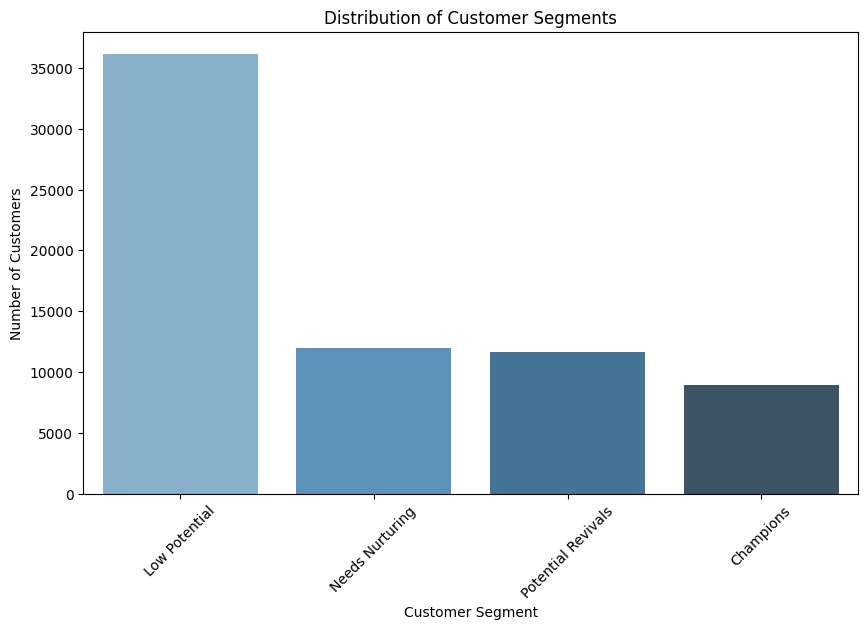


Revenue Contribution by Segment:
     Customer_Segment      Monetary
0           Champions  1.038614e+09
1       Low Potential  1.585216e+08
3  Potential Revivals  1.027927e+08
2     Needs Nurturing  2.679709e+07


<ipython-input-20-e3bb87c70901>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Segment', y='Monetary', data=revenue_contribution, palette='Blues_d')


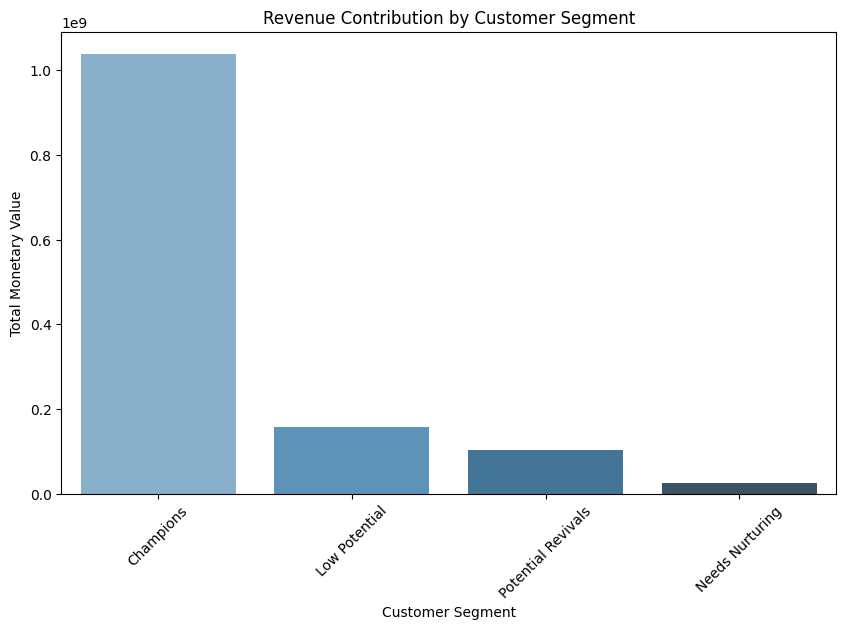


Top 5 customers in segment: Low Potential
            customer_number  Recency  Frequency   Monetary R_Score F_Score  \
24386  30303430353839343830       44        227  957623.55       3       4   
30210  30303430363035353331       81         61  931258.90       3       4   
49750  30303430363533363533       41         98  801903.33       3       4   
32949  30303430363132333238       86        141  677261.50       3       4   
23459  30303430353836373733       44         85  596213.60       3       4   

      M_Score RFM_Score Customer_Segment  
24386       4       344    Low Potential  
30210       4       344    Low Potential  
49750       4       344    Low Potential  
32949       4       344    Low Potential  
23459       4       344    Low Potential  

Top 5 customers in segment: Champions
            customer_number  Recency  Frequency    Monetary R_Score F_Score  \
3201   30303430353136333739        1       1365  8427424.27       4       4   
21823  30303430353832333839      

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate Recency, Frequency, and Monetary value
max_order_date = all_data_sorted_filled['order_date'].max()
rfm = all_data_sorted_filled.groupby('customer_number').agg({
    'order_date': lambda x: (max_order_date - x.max()).days,
    'order_number': 'nunique',
    'order_material_net_value': 'sum'
}).reset_index()

rfm.columns = ['customer_number', 'Recency', 'Frequency', 'Monetary']

# Calculate R, F, M scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine RFM scores into a single string for easier segmentation
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Define customer segments
def segment_customers(row):
    r_score, f_score, m_score = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])

    if r_score == 4 and f_score == 4 and m_score == 4:
        return 'Champions'
    elif r_score >= 3 and f_score >= 3 and m_score < 4:
        return 'Needs Nurturing'
    elif m_score >= 3 and (r_score < 3 or f_score < 3):
        return 'Potential Revivals'
    else:
        return 'Low Potential'

# Apply the segmentation function
rfm['Customer_Segment'] = rfm.apply(segment_customers, axis=1)

# Analyze Customer Segments
print("RFM Scoring Model and Customer Segmentation:")
print(rfm.head())

# Distribution of customer segments
segment_distribution = rfm['Customer_Segment'].value_counts().reset_index()
segment_distribution.columns = ['Segment', 'Count']
print("\nDistribution of Customer Segments:")
print(segment_distribution)

# Plot the distribution of customer segments
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_Segment', data=rfm, palette='Blues_d', order=segment_distribution['Segment'])
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Segments')
plt.xticks(rotation=45)
plt.show()

# Revenue contribution by segment
revenue_contribution = rfm.groupby('Customer_Segment')['Monetary'].sum().reset_index().sort_values(by='Monetary', ascending=False)
print("\nRevenue Contribution by Segment:")
print(revenue_contribution)

# Plot the revenue contribution of customer segments
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_Segment', y='Monetary', data=revenue_contribution, palette='Blues_d')
plt.xlabel('Customer Segment')
plt.ylabel('Total Monetary Value')
plt.title('Revenue Contribution by Customer Segment')
plt.xticks(rotation=45)
plt.show()

# Top customers in each segment (showing the top 5 for each segment)
for segment in rfm['Customer_Segment'].unique():
    print(f"\nTop 5 customers in segment: {segment}")
    top_customers = rfm[rfm['Customer_Segment'] == segment].sort_values(by='Monetary', ascending=False).head(5)
    print(top_customers)


In [21]:
# Use quintiles for more detailed scoring
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Counts:
 Cluster
0    45601
2    19779
3     2966
1      432
4       27
Name: count, dtype: int64
Silhouette Score: 0.6131971814619511
Cluster Profiles:
   Cluster     Recency    Frequency      Monetary
0        0   98.485494    10.599658  8.915531e+03
1        1    5.307870   303.310185  6.819702e+05
2        2  550.445169     2.428839  1.694980e+03
3        3   14.562036   110.732299  1.785562e+05
4        4    2.666667  1234.518519  2.312392e+06


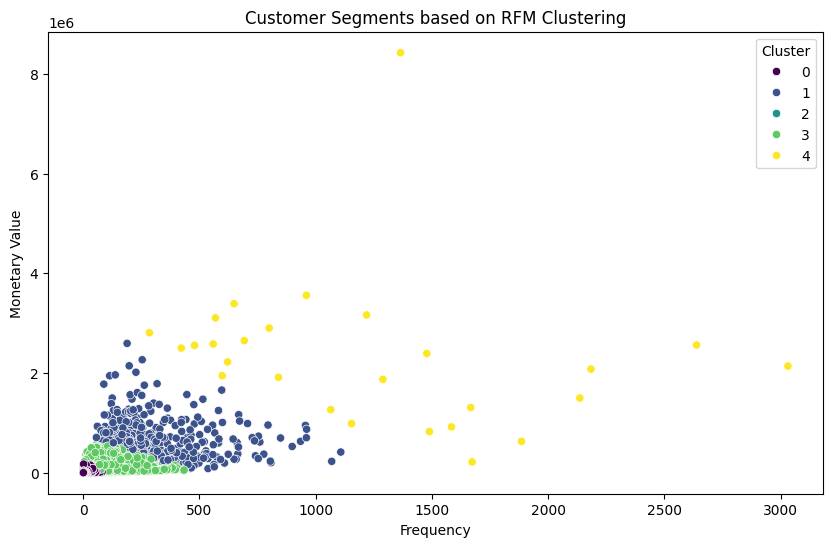

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Scale the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, max_iter=500, init='k-means++')
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Check for cluster counts
cluster_counts = rfm['Cluster'].value_counts()
print("Cluster Counts:\n", cluster_counts)

# Evaluate clustering with silhouette score
silhouette_avg = silhouette_score(rfm_scaled, rfm['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Analyze the clusters
cluster_profiles = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print("Cluster Profiles:")
print(cluster_profiles)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Customer Segments based on RFM Clustering')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.show()


In [23]:
if 'is_churn' not in rfm.columns:
    print("Column 'is_churn' does not exist in the DataFrame.")
else:
    y = rfm['is_churn']


Column 'is_churn' does not exist in the DataFrame.


In [24]:
# Adding a 'churned' column based on recency
rfm['is_churn'] = rfm['Recency'] > 365

# Calculate the churn rate
total_customers = len(rfm)
churned_customers = rfm['is_churn'].sum()
churn_rate = (churned_customers / total_customers) * 100

print(f"Churn Rate: {churn_rate:.2f}%")


Churn Rate: 25.35%


<ipython-input-25-45496f480c76>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_churn', data=rfm, palette='coolwarm')


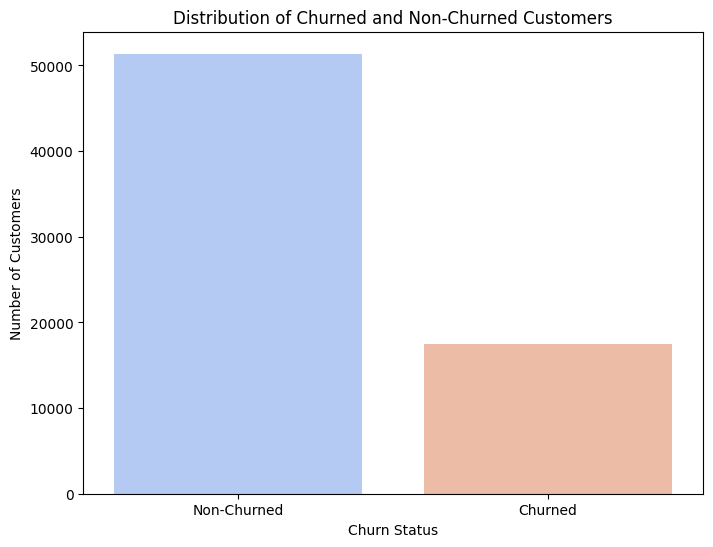

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of churned and non-churned customers
plt.figure(figsize=(8, 6))
sns.countplot(x='is_churn', data=rfm, palette='coolwarm')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.title('Distribution of Churned and Non-Churned Customers')
plt.xticks(ticks=[0, 1], labels=['Non-Churned', 'Churned'])
plt.show()


In [26]:
# Adding a dummy 'is_churn' column for demonstration purposes

import numpy as np

np.random.seed(42)  # For reproducibility
rfm['is_churn'] = np.random.choice([0, 1], size=len(rfm), p=[0.75, 0.25])  # Assuming 20% churn rate for testing

# churn analysis
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['is_churn']

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Churn Prediction Report:")
print(classification_report(y_test, y_pred))


Churn Prediction Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.82     15517
           1       0.26      0.12      0.16      5125

    accuracy                           0.70     20642
   macro avg       0.51      0.50      0.49     20642
weighted avg       0.63      0.70      0.65     20642



In [27]:
def segment_customers(row):
    r_score, f_score, m_score = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])

    if r_score >= 4 and f_score >= 4 and m_score >= 4:
        return 'Champions'
    elif r_score >= 4 and f_score >= 3:
        return 'Loyal Customers'
    elif m_score >= 4 and f_score >= 4:
        return 'Big Spenders'
    elif r_score <= 2 and f_score <= 2 and m_score <= 2:
        return 'At Risk'
    elif r_score >= 4:
        return 'New Customers'
    elif f_score >= 4:
        return 'Frequent Buyers'
    elif m_score >= 4:
        return 'High Value'
    else:
        return 'Others'

rfm['Customer_Segment'] = rfm.apply(segment_customers, axis=1)


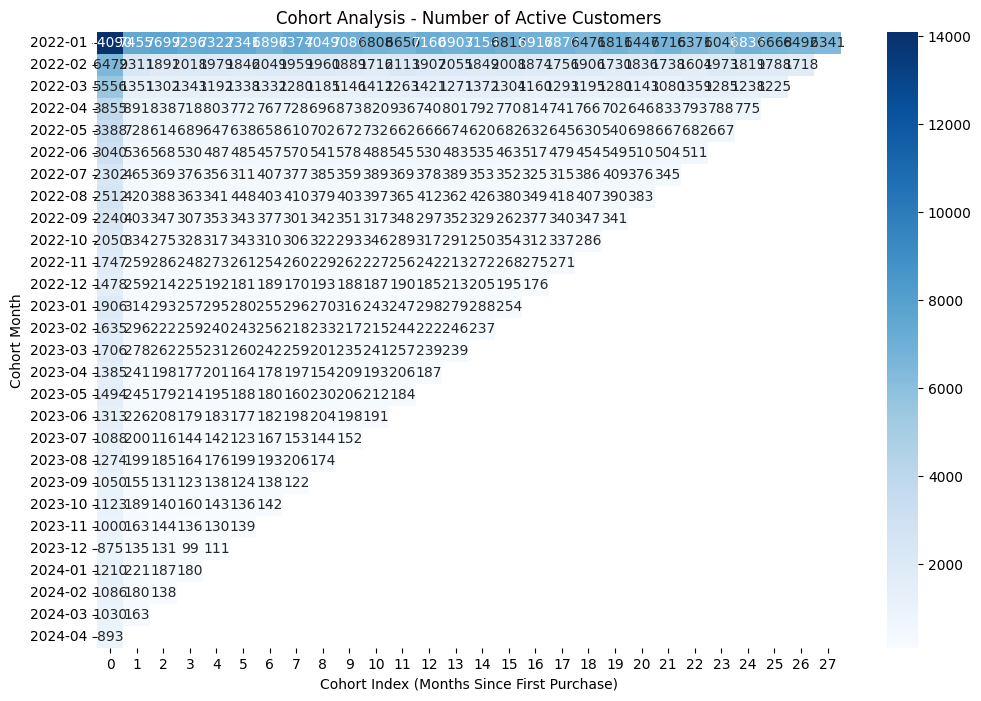

In [28]:
# Create a new column for the order month
all_data_sorted_filled['OrderMonth'] = all_data_sorted_filled['order_date'].dt.to_period('M')

# Identify the first purchase month for each customer
first_purchase = all_data_sorted_filled.groupby('customer_number')['OrderMonth'].min().reset_index()
first_purchase.columns = ['customer_number', 'CohortMonth']

# Merge the first purchase month back to the original data
cohort_data = pd.merge(all_data_sorted_filled, first_purchase, on='customer_number')

# Calculate the Cohort Index (number of months since the first purchase)
cohort_data['CohortIndex'] = (cohort_data['OrderMonth'] - cohort_data['CohortMonth']).apply(lambda x: x.n)

# Pivot the data to create a cohort table
cohort_pivot = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='customer_number', aggfunc=pd.Series.nunique)

# Plot the cohort analysis heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt='g', cmap='Blues')
plt.title('Cohort Analysis - Number of Active Customers')
plt.xlabel('Cohort Index (Months Since First Purchase)')
plt.ylabel('Cohort Month')
plt.show()


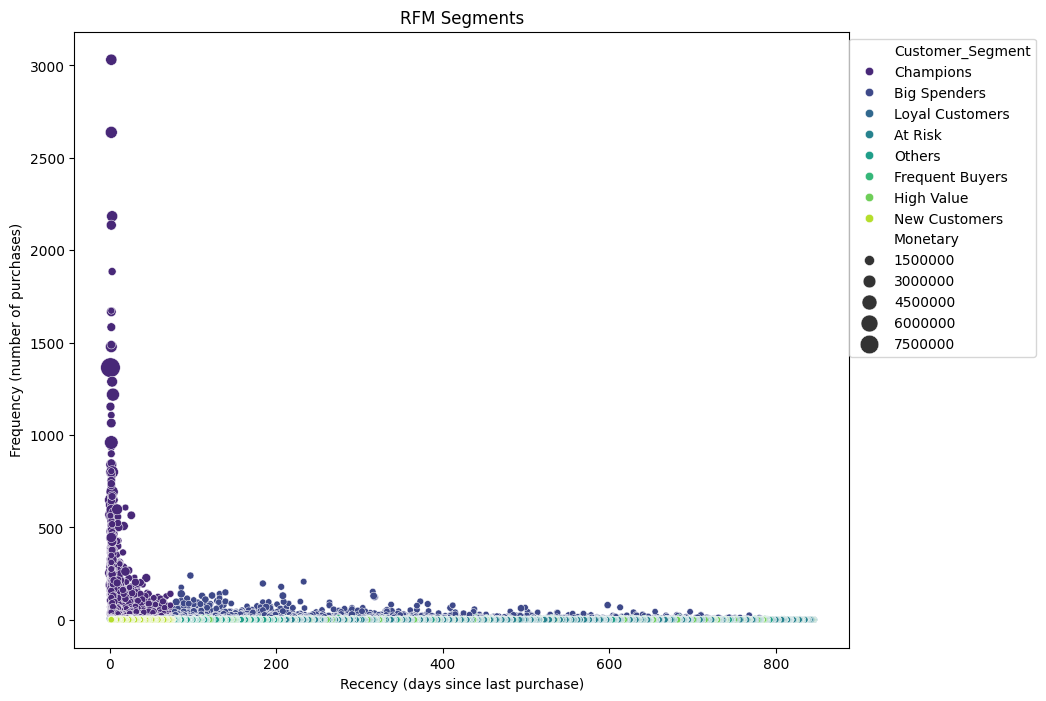

In [29]:
# Advanced RFM scatter plot with seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Recency', y='Frequency', size='Monetary', hue='Customer_Segment', data=rfm, palette='viridis', sizes=(20, 200))
plt.title('RFM Segments')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Frequency (number of purchases)')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


In [30]:
from sklearn.linear_model import LinearRegression

# Example of predicting future value
# Create a future_value column
rfm['future_value'] = rfm['Monetary'] * 1.2  # Dummy multiplier for demonstration

X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['future_value']

model = LinearRegression()
model.fit(X, y)

rfm['Predicted_Future_Value'] = model.predict(X)

print("Predicted Future Value:")
print(rfm[['customer_number', 'Predicted_Future_Value']].head())


Predicted Future Value:
        customer_number  Predicted_Future_Value
0  30303430353030313430               10606.800
1  30303430353030313630              632548.596
2  30303430353030313631                5945.760
3  30303430353030313633               78604.356
4  30303430353030313732              357962.616


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 14.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=bbe4dfdd5b53ae5b42ecbe13e1ea5a1035ae2ce656d4b532c802eb6d875e68dd
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


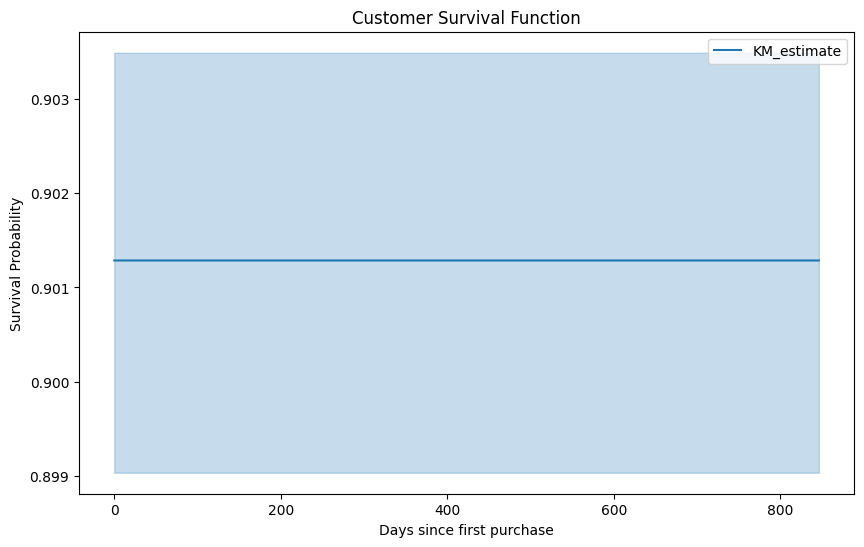

               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
R_Score    0.100789   1.106043  0.010715        0.079787        0.121790   
F_Score   -1.910073   0.148070  0.032777       -1.974315       -1.845832   
M_Score   -0.654036   0.519943  0.020924       -0.695046       -0.613026   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to          z  \
covariate                                                                
R_Score               1.083057             1.129517     0.0   9.406146   
F_Score               0.138856             0.157894     0.0 -58.275113   
M_Score               0.499052             0.541709     0.0 -31.258124   

                       p    -log2(p)  
covariate                             
R_Score     5.146642e-21   67.396858  
F_Score     0.000000e+00         inf  
M_Score    1.731470e-214  710.100615  


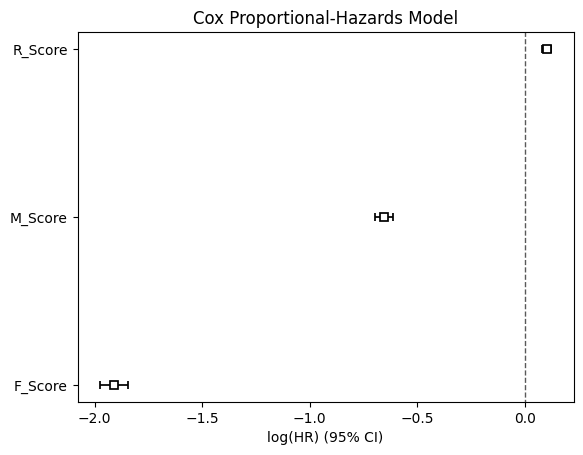

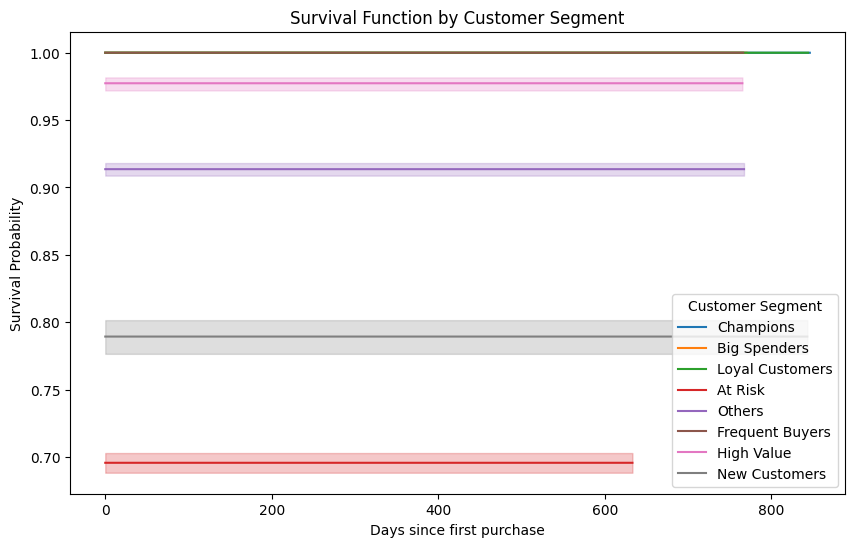

In [31]:
!pip install lifelines

import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter, CoxPHFitter

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the time between the first and the last order for each customer
customer_lifetime = all_data_sorted_filled.groupby('customer_number').agg(
    First_Purchase=('order_date', 'min'),
    Last_Purchase=('order_date', 'max'),
    Frequency=('order_number', 'count')
).reset_index()

# Calculate duration (time in days between first and last purchase)
customer_lifetime['Duration'] = (customer_lifetime['Last_Purchase'] - customer_lifetime['First_Purchase']).dt.days

# Assume customers with only one purchase have churned

customer_lifetime['Churned'] = customer_lifetime['Frequency'] == 1

# Initialize the Kaplan-Meier Fitter model
kmf = KaplanMeierFitter()

# Fit the model with the data
kmf.fit(durations=customer_lifetime['Duration'], event_observed=customer_lifetime['Churned'])

# Plot the survival function
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Customer Survival Function')
plt.xlabel('Days since first purchase')
plt.ylabel('Survival Probability')
plt.show()

# For Cox Proportional-Hazards Model

rfm['Duration'] = customer_lifetime['Duration']
rfm['Churned'] = customer_lifetime['Churned']

# Fit the CoxPH model
cph = CoxPHFitter()
cph.fit(rfm[['Duration', 'Churned', 'R_Score', 'F_Score', 'M_Score']], duration_col='Duration', event_col='Churned')

# Print the summary
print(cph.summary)

# Plot the CoxPH survival curves for different segments
cph.plot()
plt.title('Cox Proportional-Hazards Model')
plt.show()

# Survival curves for different RFM segments
plt.figure(figsize=(10, 6))
for segment in rfm['Customer_Segment'].unique():
    kmf.fit(rfm[rfm['Customer_Segment'] == segment]['Duration'],
            event_observed=rfm[rfm['Customer_Segment'] == segment]['Churned'], label=segment)
    kmf.plot_survival_function()
plt.title('Survival Function by Customer Segment')
plt.xlabel('Days since first purchase')
plt.ylabel('Survival Probability')
plt.legend(title='Customer Segment')
plt.show()

                              PRH4   count
0                Other Prosthetics  754908
1              BL Healing Surgical  394932
2  BLAT TiZr Implants, hydrophilic  190838
3       BLAT Ti Implants, standard  176893
4      Instruments, Cases + Others  161621
5       Instruments, Drills + Taps  156278
6               Abutments, Ti Base  146881
7     BLAT TiZr Implants, standard  123640
8                   Abutments, SRA  119023
9    BLAT Ti Implants, hydrophilic  104643


<ipython-input-32-f2312639713f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='PRH4', data=item_counts.head(20), palette='viridis')  # Display the top 20 most popular items


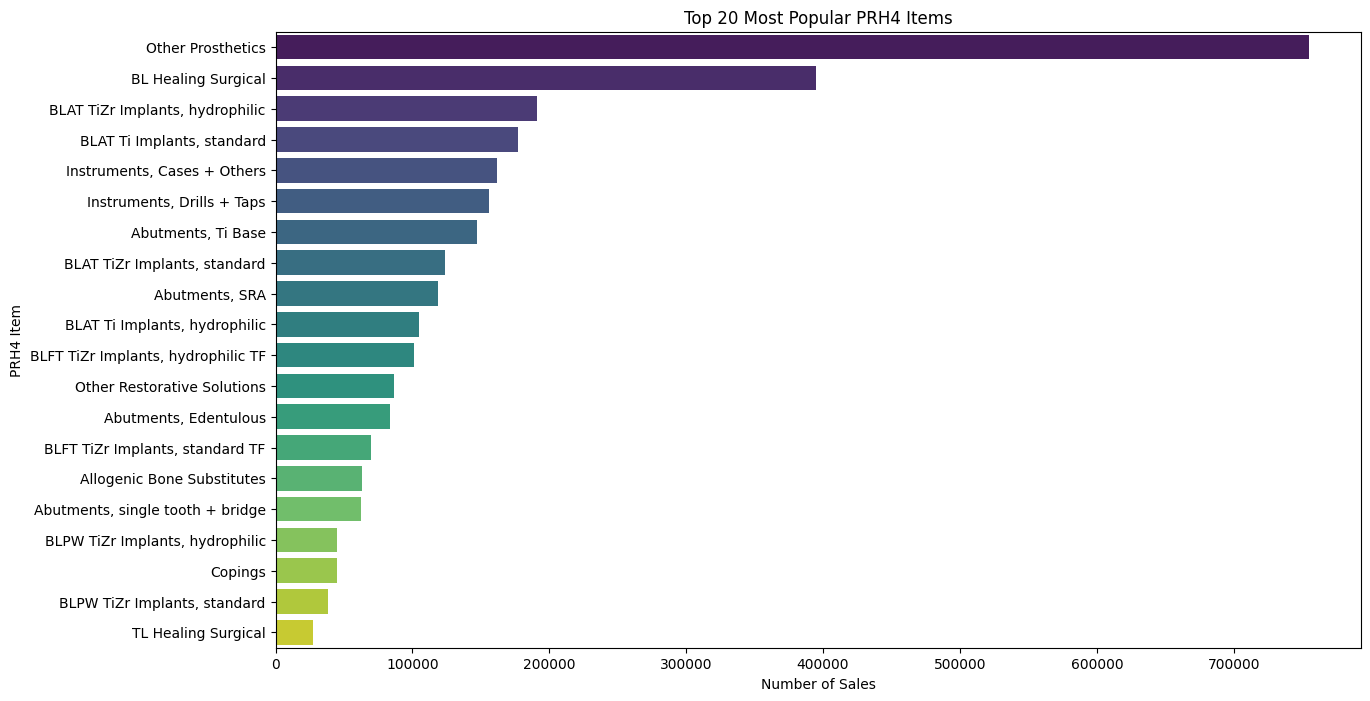

In [32]:
import pandas as pd
import matplotlib.pyplot as plt



# Group the data by 'PRH4' and count the occurrences of each item
item_counts = all_data_sorted_filled['PRH4'].value_counts().reset_index()
item_counts.columns = ['PRH4', 'count']

# Display the top 10 most popular items for reference
print(item_counts.head(10))

# Visualize the results using a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='PRH4', data=item_counts.head(20), palette='viridis')  # Display the top 20 most popular items
plt.title('Top 20 Most Popular PRH4 Items')
plt.xlabel('Number of Sales')
plt.ylabel('PRH4 Item')
plt.show()


In [33]:
!pip install mlxtend


                          antecedents                        consequents  \
4       (Other Restorative Solutions)            (Abutments, Edentulous)   
5             (Abutments, Edentulous)      (Other Restorative Solutions)   
10      (Instruments, Cases + Others)       (Instruments, Drills + Taps)   
11       (Instruments, Drills + Taps)      (Instruments, Cases + Others)   
7   (BLPW TiZr Implants, hydrophilic)              (BL Healing Surgical)   
6               (BL Healing Surgical)  (BLPW TiZr Implants, hydrophilic)   
2               (BL Healing Surgical)  (BLAT TiZr Implants, hydrophilic)   
3   (BLAT TiZr Implants, hydrophilic)              (BL Healing Surgical)   
9      (BLAT TiZr Implants, standard)              (BL Healing Surgical)   
8               (BL Healing Surgical)     (BLAT TiZr Implants, standard)   

    antecedent support  consequent support   support  confidence      lift  \
4             0.043034            0.040238  0.015449    0.359002  8.922026   
5      

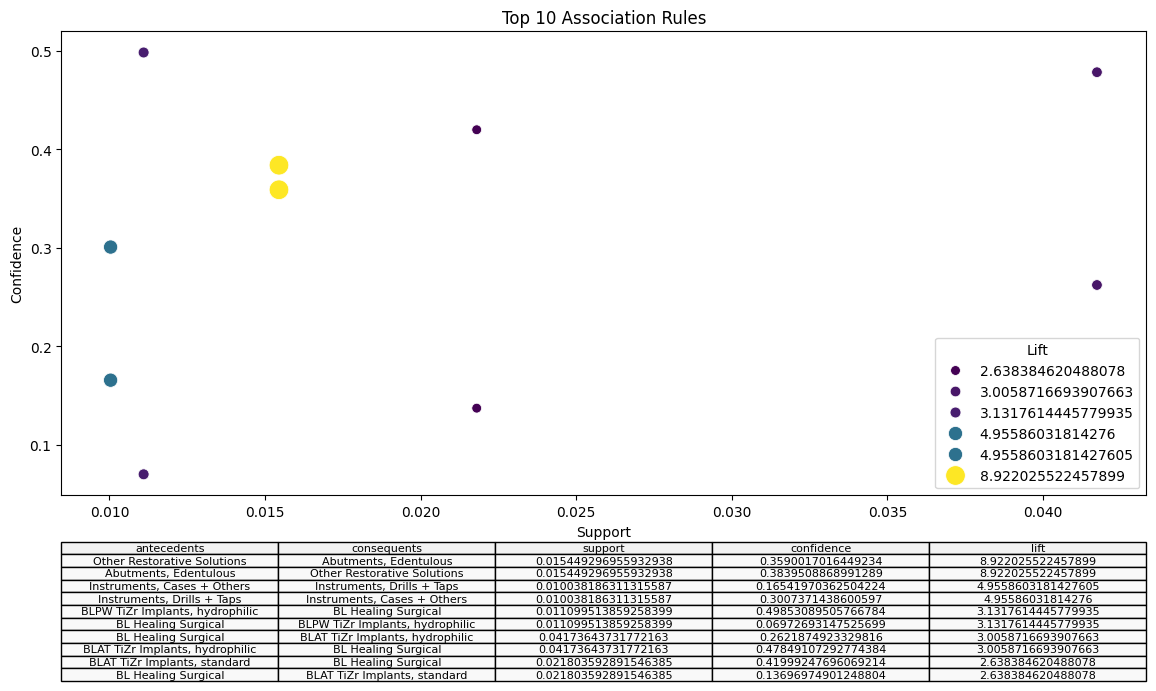

In [34]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Convert all PRH4 values to strings
all_data_sorted_filled['PRH4'] = all_data_sorted_filled['PRH4'].astype(str)

# Grouping the data by order number and extracting the product descriptions from the PRH4 column for each order
transactions = all_data_sorted_filled.groupby('order_number')['PRH4'].apply(list)

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the FP-Growth Algorithm
frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)  # Adjust min_support as needed

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort rules by lift in descending order and display the top 10
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Print top rules
print(top_rules)

# Prepare the data for the table
table_data = top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].copy()
table_data.loc[:, 'antecedents'] = table_data['antecedents'].apply(lambda x: ', '.join(list(x)))
table_data.loc[:, 'consequents'] = table_data['consequents'].apply(lambda x: ', '.join(list(x)))

# Visualize the top 10 rules using a scatter plot
fig, ax = plt.subplots(figsize=(14, 8))

sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=top_rules, palette='viridis', sizes=(50, 200), ax=ax)
plt.title('Top 10 Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(loc='best', title='Lift')

# Create the table
ax_table = fig.add_subplot(111, frame_on=False)  # Add a new subplot for the table
ax_table.xaxis.set_visible(False)  # Hide the x-axis
ax_table.yaxis.set_visible(False)  # Hide the y-axis

# Create a table with larger font size
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0.0, -0.4, 1.0, 0.3],  # Adjust the bbox parameter to position the table correctly
                  colColours=['#f2f2f2']*5,  # Add background color for better readability
                  cellColours=[['#f9f9f9']*5]*10,  # Add background color for better readability
                  fontsize=14)  # Increase the font size

# Adjust the bottom to make room for the table
plt.subplots_adjust(bottom=0.3)

# Resize table cells for better readability
table.auto_set_font_size(True)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Adjust the scale of the table

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


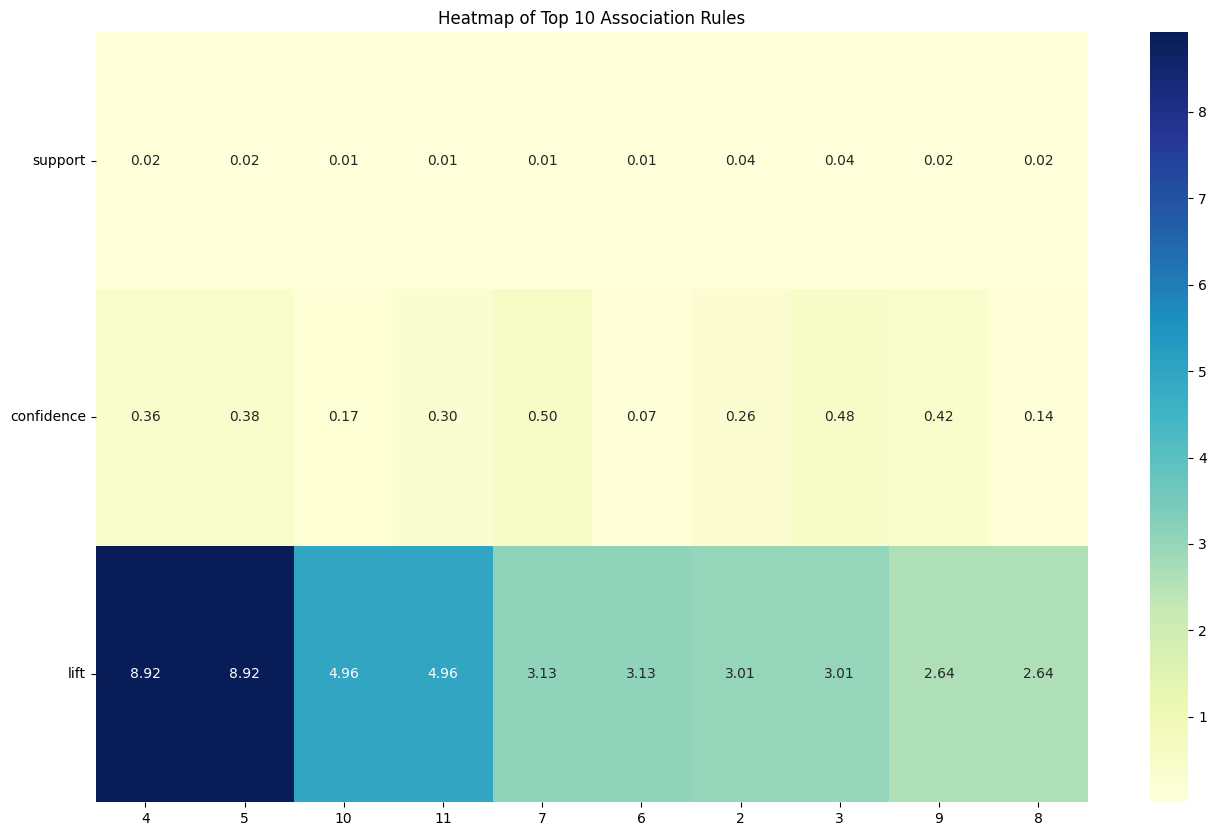

In [35]:
# Create the heatmap
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(top_rules[['support', 'confidence', 'lift']].T, annot=True, fmt=".2f", cmap="YlGnBu", ax=ax)
plt.title('Heatmap of Top 10 Association Rules')
plt.yticks(rotation=0)
plt.show()

In [36]:


# Unique values in PRH1
unique_prh1 = all_data_sorted_filled['PRH1'].unique()
print("Unique values in PRH1:")
print(unique_prh1)

# Unique values in PRH4
unique_prh4 = all_data_sorted_filled['PRH4'].unique()
print("Unique values in PRH4:")
print(unique_prh4)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unique values in PRH1:
['Restorative Solutions' 'Implant Solutions' 'Biomaterials'
 'Others (PRH 1)' 'Not assigned' 'Digital Enablers' 'Orthodontics']
Unique values in PRH4:
['Abutments, SRA' 'Other Prosthetics' 'Other Restorative Solutions'
 'Abutments, Edentulous' 'Abutments, single tooth + bridge'
 'TLPW TiZr Implants, standard' 'BLAT TiZr Implants, standard'
 'TL Healing Surgical' 'BLAT TiZr Implants, hydrophilic'
 'BL Healing Surgical' 'Allogenic Bone Substitutes'
 'Instruments, Cases + Others' 'Instruments, Drills + Taps'
 'Ceramic Implants, TL' 'Local 3rd Party Products'
 'TLPW Ti Implants, standard' 'BLAT Ti Implants, standard' 'Emdogain'
 'TLPW TiZr Implants, hydrophilic' 'TLFT TiZr Implants, hydrophilic TF'
 'BLAT TiZr Implants, hydrophilic TF' 'TLAT TiZr Implants, hydrophilic TF'
 'n/a' 'Abutments, Ti Base' 'Consumables, Liquids' 'Copings'
 'Digital Accessories + Others' 'Porcine Collagen Membranes'
 'BLFT TiZr Implants, standard TF' 'Instruments + Auxiliaries GBR'
 'BLFT Ti

In [37]:


# Count occurrences of each unique value in PRH1
prh1_counts = all_data_sorted_filled['PRH1'].value_counts()
print("Occurrences of each unique value in PRH1:")
print(prh1_counts)

# Count occurrences of each unique value in PRH4
prh4_counts = all_data_sorted_filled['PRH4'].value_counts()
print("Occurrences of each unique value in PRH4:")
print(prh4_counts)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Occurrences of each unique value in PRH1:
PRH1
Implant Solutions        1670581
Restorative Solutions    1321414
Biomaterials              127023
Digital Enablers           34103
Others (PRH 1)             13850
Not assigned                 219
Orthodontics                   4
Name: count, dtype: int64
Occurrences of each unique value in PRH4:
PRH4
Other Prosthetics                  754908
BL Healing Surgical                394932
BLAT TiZr Implants, hydrophilic    190838
BLAT Ti Implants, standard         176893
Instruments, Cases + Others        161621
                                    ...  
BLAT Ti Implants, standard EXT         14
Abutments, Customized                   6
Rebilled Shipping                       5
Other Orthodontics                      4
Prevention                              2
Name: count, Length: 68, dtype: int64


In [38]:
import pandas as pd

data = all_data_sorted_filled

# Convert data to DataFrame
df = pd.DataFrame(data)

# Define the category mapping dictionary
category_mapping = {
    'abutments, sra': 'Abutments',
    'other prosthetics': 'Prosthetics',
    'other restorative solutions': 'Restorative Solutions',
    'abutments, edentulous': 'Abutments',
    'abutments, single tooth + bridge': 'Abutments',
    'tlpw tizr implants, standard': 'Implants',
    'blat tizr implants, standard': 'Implants',
    'tl healing surgical': 'Healing Components',
    'blat tizr implants, hydrophilic': 'Implants',
    'bl healing surgical': 'Healing Components',
    'allogenic bone substitutes': 'Bone Substitutes',
    'instruments, cases + others': 'Instruments',
    'instruments, drills + taps': 'Instruments',
    'ceramic implants, tl': 'Ceramic Implants',
    'local 3rd party products': 'Miscellaneous',
    'tlpw ti implants, standard': 'Implants',
    'blat ti implants, standard': 'Implants',
    'emdogain': 'Miscellaneous',
    'tlpw tizr implants, hydrophilic': 'Implants',
    'tlft tizr implants, hydrophilic tf': 'Implants',
    'blat tizr implants, hydrophilic tf': 'Implants',
    'tlat tizr implants, hydrophilic tf': 'Implants',
    'n/a': 'Not Available',
    'abutments, ti base': 'Abutments',
    'consumables, liquids': 'Consumables',
    'copings': 'Miscellaneous',
    'digital accessories + others': 'Miscellaneous',
    'porcine collagen membranes': 'Collagen Membranes',
    'blft tizr implants, standard tf': 'Implants',
    'instruments + auxiliaries gbr': 'Instruments',
    'blft tizr implants, hydrophilic tf': 'Implants',
    'tlft tizr implants, standard tf': 'Implants',
    'allogenic soft tissue grafts': 'Soft Tissue Grafts',
    'miscellaneous + others': 'Miscellaneous',
    'xenogenic bone substitutes': 'Bone Substitutes',
    'surgical planning software': 'Surgical Planning',
    'intraoral hardware': 'Hardware',
    'in-lab 3d printer hardware': 'Hardware',
    'surgical planning services': 'Surgical Planning',
    'srbb': 'SRBB',
    'blpw ti implants, standard': 'Implants',
    'blpw tizr implants, standard': 'Implants',
    'blpw tizr implants, hydrophilic': 'Implants',
    'blat ti implants, hydrophilic': 'Implants',
    'abutments, customizable': 'Abutments',
    'other implants': 'Implants',
    'zygomatic implants': 'Implants',
    'customer education': 'Education',
    'synthetic bone substitutes': 'Bone Substitutes',
    'discs': 'Miscellaneous',
    'bovine collagen membranes': 'Collagen Membranes',
    'other software + license': 'Software',
    'blpw ti implants, hydrophilic': 'Implants',
    'collagen plugs': 'Miscellaneous',
    'other services': 'Miscellaneous',
    'surgical equipment + others': 'Equipment',
    'abutments, customized': 'Abutments',
    'blft ti implants, hydrophilic': 'Implants',
    'tlat ti implants, hydrophilic': 'Implants',
    'in-lab milling hardware': 'Hardware',
    'ceramic implants, bl': 'Ceramic Implants',
    'blft ti implants, standard': 'Implants',
    'lab scan + design hardware': 'Hardware',
    'blocks': 'Miscellaneous',
    'blat ti implants, standard ext': 'Implants',
    'prevention': 'Miscellaneous',
    'rebilled shipping': 'Shipping',
    'other orthodontics': 'Orthodontics'
}

# Apply category mapping to the PRH4 column in the DataFrame
df['Category'] = df['PRH4'].str.lower().replace(category_mapping)

# Display the DataFrame with mapped categories
print(df)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


        order_date  order_number material_number  order_material_net_value  \
358285  2022-01-12     111804810       022.0132S                    217.50   
446035  2022-01-28     111854082        024.2371                    235.50   
171487  2022-02-14     111896520       048.188V4                     50.00   
213090  2022-02-14     111896520        022.4504                    167.00   
390777  2022-02-14     111896520        022.4503                    334.00   
...            ...           ...             ...                       ...   
2986843 2024-04-26    3029652656     Y900114-STM                    113.00   
2995416 2024-04-26    3029652656        021.0010                    815.85   
3111662 2024-04-26    3029652656       035.9010S                   1727.88   
3140684 2024-04-26    3029652656       C1003-STM                    827.07   
3121603 2024-04-26    3029653149        025.4201                    145.00   

        sales_channel                   PRH1  \
358285         

In [39]:
print(df.columns)


Index(['order_date', 'order_number', 'material_number',
       'order_material_net_value', 'sales_channel', 'PRH1', 'PRH4',
       'customer_group', 'customer_number', 'region', 'DSO_Ind', 'Recency',
       'OrderMonth', 'Category'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:

import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Assuming df is your DataFrame with relevant columns including 'Category'
# Convert 'order_number' to string type for processing (if it's an integer)
df['order_number'] = df['order_number'].astype(str)


# Group by 'order_number' and aggregate 'Category' into lists
basket = df.groupby('order_number')['Category'].apply(list).reset_index(name='items')

# Use MultiLabelBinarizer to create one-hot encoded DataFrame
mlb = MultiLabelBinarizer()
basket_encoded = pd.DataFrame(mlb.fit_transform(basket['items']), columns=mlb.classes_, index=basket.index)

# Display the encoded DataFrame
print(basket_encoded.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   Abutments  Bone Substitutes  Ceramic Implants  Collagen Membranes  \
0          0                 0                 0                   0   
1          0                 0                 0                   0   
2          1                 0                 0                   0   
3          0                 0                 0                   0   
4          1                 0                 0                   0   

   Consumables  Education  Equipment  Hardware  Healing Components  Implants  \
0            0          0          0         0                   0         0   
1            0          0          0         0                   0         0   
2            0          0          0         0                   0         0   
3            0          0          0         0                   0         0   
4            0          0          0         0                   0         0   

   ...  Miscellaneous  Not Available  Orthodontics  Prosthetics  \
0  ...             

In [41]:
from mlxtend.frequent_patterns import apriori, association_rules

# Find frequent itemsets with minimum support threshold
min_support = 0.02  # Adjust this value as per your dataset
frequent_itemsets = apriori(basket_encoded, min_support=min_support, use_colnames=True)

# Display frequent itemsets
print(frequent_itemsets)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     support                           itemsets
0   0.216862                        (Abutments)
1   0.047363                 (Bone Substitutes)
2   0.170184               (Healing Components)
3   0.299815                         (Implants)
4   0.088501                      (Instruments)
5   0.079395                    (Miscellaneous)
6   0.401042                      (Prosthetics)
7   0.043034            (Restorative Solutions)
8   0.030760              (Implants, Abutments)
9   0.064126           (Abutments, Prosthetics)
10  0.111971     (Implants, Healing Components)
11  0.030632  (Prosthetics, Healing Components)
12  0.022882            (Implants, Instruments)
13  0.037385            (Implants, Prosthetics)


In [42]:
# Generate association rules
min_threshold = 1.0  # Adjust this value as per your dataset
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)

# Display association rules
print(rules)


            antecedents           consequents  antecedent support  \
0            (Implants)  (Healing Components)            0.299815   
1  (Healing Components)            (Implants)            0.170184   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.170184  0.111971    0.373466  2.194477  0.060947    1.324454   
1            0.299815  0.111971    0.657937  2.194477  0.060947    2.046945   

   zhangs_metric  
0       0.777381  
1       0.655942  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


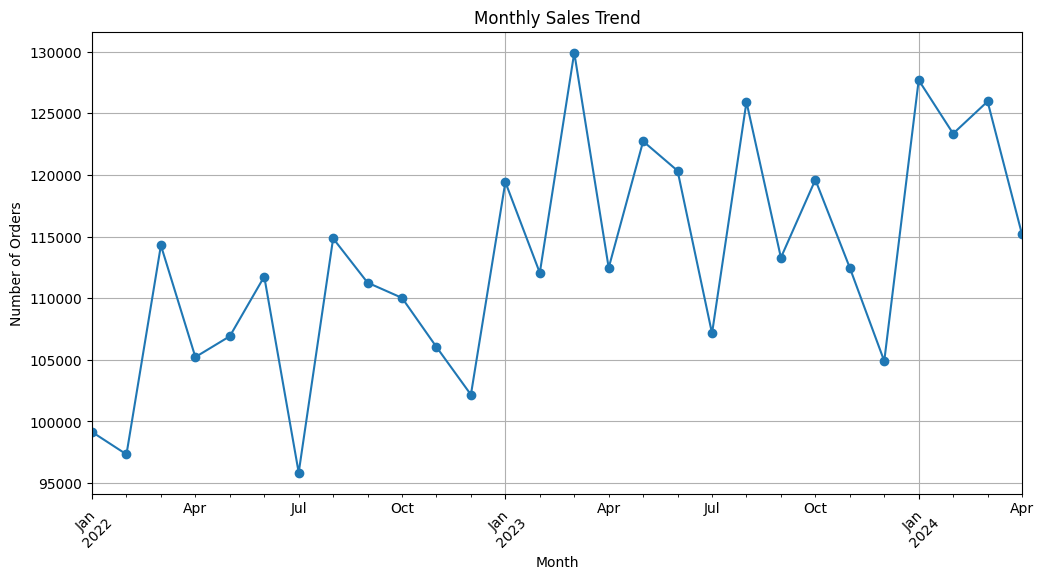

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Load your transaction data (assuming 'df' contains your transaction data)
# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract month and year for analysis
df['order_month'] = df['order_date'].dt.to_period('M')

# Compute monthly sales
monthly_sales = df.groupby('order_month')['order_number'].count()

# Visualize monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [44]:
!pip install prefixspan

from prefixspan import PrefixSpan

# Perform sequence mining using PrefixSpan
# Convert basket (list of lists) to sequences format
sequences = basket['items'].tolist()

# Initialize PrefixSpan model
ps = PrefixSpan(sequences)

# Mine frequent sequential patterns
patterns = ps.topk(10)  # Get top 10 frequent patterns
for pattern in patterns:
    print(pattern)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11221 sha256=34b2acfb9731709e6ef85ac1a1c00708e0edff2e7b02f7736f67fc3a27ac4e3f
  Stored in directory: /root/.cache/pip/wheels/bf/96/ee/9e087a6d0d3163ee363c069bf80eaa4ca4f5ee51f2b2b0521c
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=d486105e64e2583c5992fb9aa4167cd7eb55d6cf696666d6e4138327c75bb8d3
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for extratools: filename=extratools-0.8.2.1-py3-none-any.whl size=28866 sha256=f4bb62ba936d37cda8a40b73517c879b15c70df780375091698642bc3443a977
  Stored in directory: /root/.cache/pip/wheels/70/f3/03/3a98db17111f679c3291413b81d2a1e6e1bad5a3441175ace7
Successfully built prefixspan docopt extratools
(410743, ['Prosthetics'])
(307067, [

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


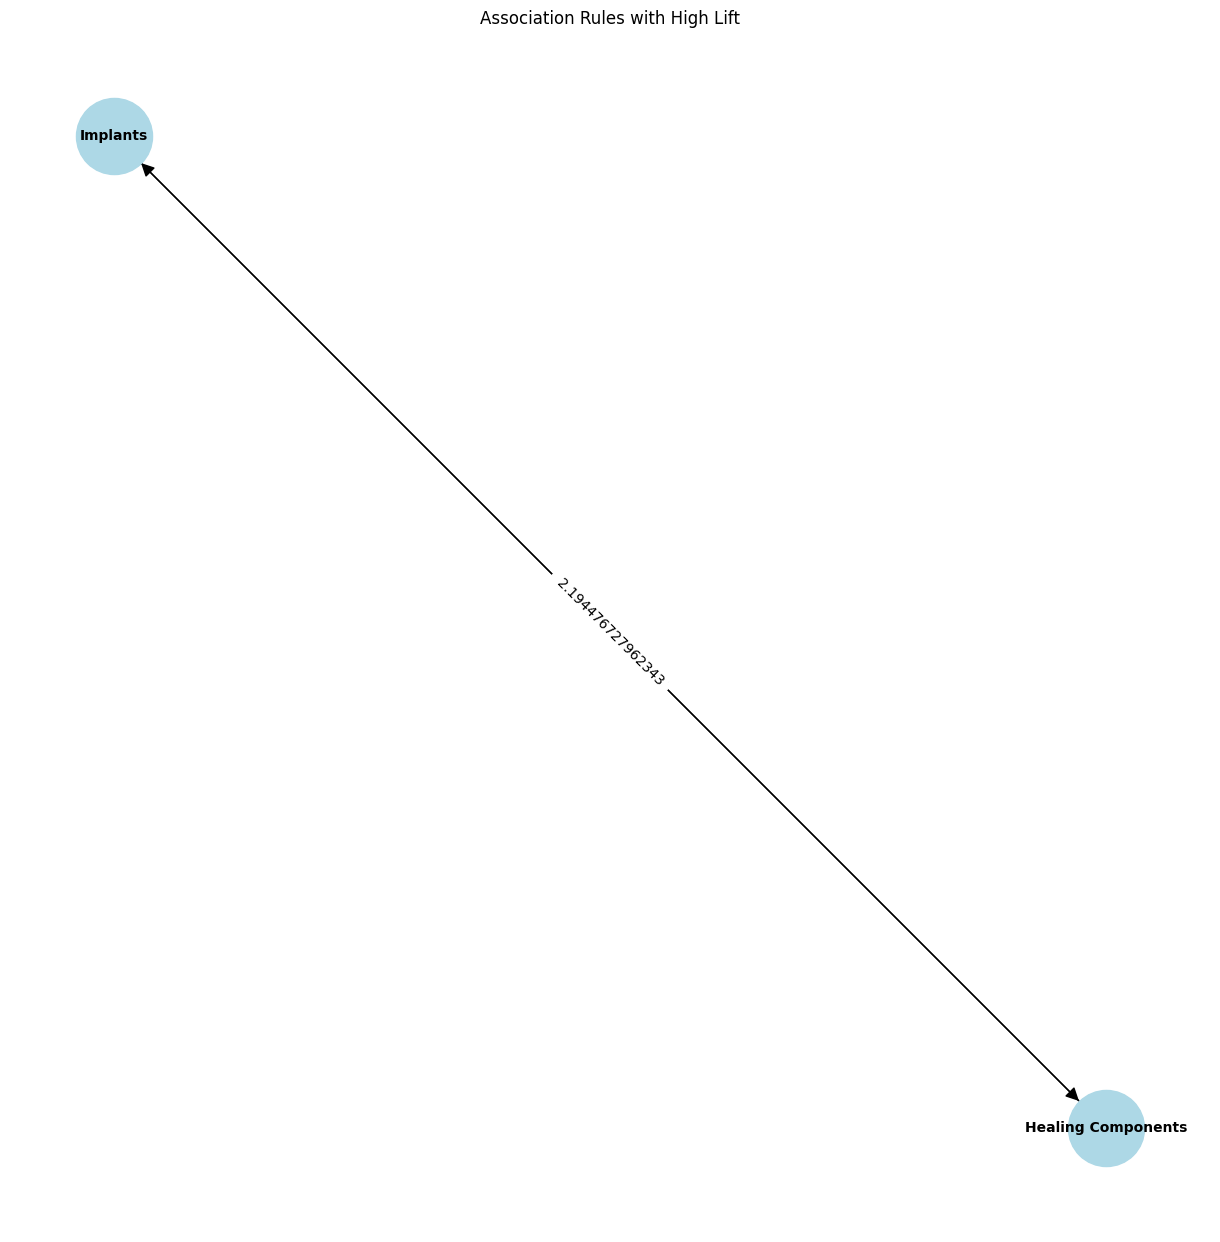

In [45]:

import matplotlib.pyplot as plt
import networkx as nx

# Filter rules with lift greater than 1.5 for stronger association
filtered_rules = rules[rules['lift'] > 1.5]

# Visualize the top association rules
def plot_rules(filtered_rules):
    G = nx.DiGraph()
    for _, rule in filtered_rules.iterrows():
        antecedents = ', '.join(rule['antecedents'])
        consequents = ', '.join(rule['consequents'])
        G.add_edge(antecedents, consequents, weight=rule['lift'])

    # Set a random seed for reproducibility

    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    plt.title("Association Rules with High Lift")
    plt.show()

plot_rules(filtered_rules)


In [46]:
# Example: Creating a DataFrame of product recommendations based on association rules
recommendations = filtered_rules[['antecedents', 'consequents', 'confidence', 'lift']].sort_values(by='lift', ascending=False)
print(recommendations.head(15))


            antecedents           consequents  confidence      lift
1  (Healing Components)            (Implants)    0.657937  2.194477
0            (Implants)  (Healing Components)    0.373466  2.194477


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
from mlxtend.frequent_patterns import apriori, association_rules

# Lower the minimum support threshold to capture more frequent itemsets
min_support = 0.01  # Adjusted to capture more items
frequent_itemsets = apriori(basket_encoded, min_support=min_support, use_colnames=True)

# Display the updated frequent itemsets
print(frequent_itemsets)

# Lower the minimum threshold for association rules to capture more rules
min_lift = 0.1  # Lowered to include more associations
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_lift)

# Filter rules by a minimum confidence threshold to ensure quality
rules = rules[rules['confidence'] > 0.2]  # Adjust as necessary

# Display the updated association rules
print(rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     support                                     itemsets
0   0.216862                                  (Abutments)
1   0.047363                           (Bone Substitutes)
2   0.017287                         (Collagen Membranes)
3   0.170184                         (Healing Components)
4   0.299815                                   (Implants)
5   0.088501                                (Instruments)
6   0.079395                              (Miscellaneous)
7   0.401042                                (Prosthetics)
8   0.043034                      (Restorative Solutions)
9   0.011067              (Abutments, Healing Components)
10  0.030760                        (Implants, Abutments)
11  0.013072                   (Abutments, Miscellaneous)
12  0.064126                     (Abutments, Prosthetics)
13  0.017642           (Restorative Solutions, Abutments)
14  0.010880       (Healing Components, Bone Substitutes)
15  0.016176                 (Implants, Bone Substitutes)
16  0.111971  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


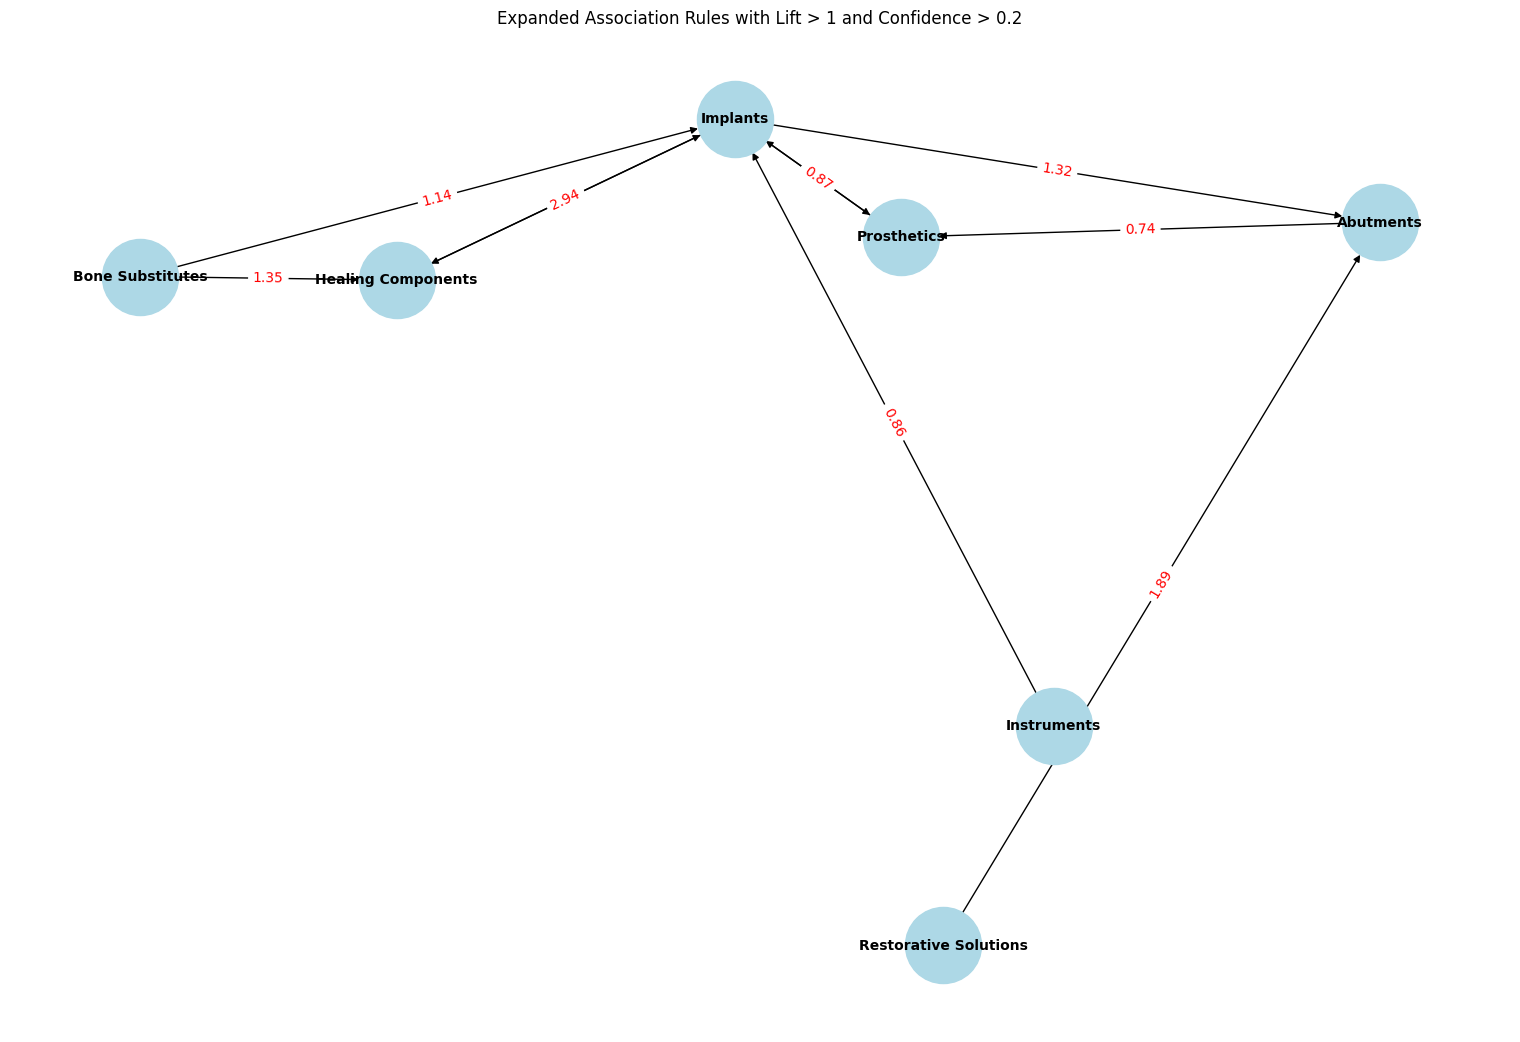

In [48]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.DiGraph()

# Add edges based on the updated rules
for _, row in rules.iterrows():
    antecedent = tuple(row['antecedents'])[0]
    consequent = tuple(row['consequents'])[0]
    confidence = row['confidence']
    lift = row['lift']
    G.add_edge(antecedent, consequent, weight=lift, label=f'{lift:.2f}', confidence=confidence)

# Position nodes using spring layout
pos = nx.spring_layout(G, seed=42)

# Draw the graph with custom labels and sizes
plt.figure(figsize=(15, 10))
edges = G.edges(data=True)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Set the title and display the plot
plt.title('Expanded Association Rules with Lift > 1 and Confidence > 0.2')
plt.show()


In [49]:
import sys
print(sys.version)



3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


# Lower the minimum support threshold to capture more frequent itemsets
min_support = 0.01  # Adjusted to capture more items
frequent_itemsets = apriori(basket_encoded, min_support=min_support, use_colnames=True)

# Lower the minimum threshold for association rules to capture more rules
min_lift = 1.0  # Lowered to include more associations
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_lift)

# Filter rules by a minimum confidence threshold to ensure quality
rules = rules[rules['confidence'] > 0.2]  # Adjust as necessary

# Display the updated association rules to verify
print(rules.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:

filtered_rules = rules[(rules['lift'] > 1) & (rules['confidence'] > 0.2)]


In [ ]:
def generate_recommendations(basket_encoded, filtered_rules, itemset):
    recommendations = []

    for item in itemset:
        matched_rules = filtered_rules[filtered_rules['antecedents'].apply(lambda x: item in x)]

        for _, rule in matched_rules.iterrows():
            consequent = list(rule['consequents'])
            recommendations.extend(consequent)

    return list(set(recommendations))

# Example: Generate recommendations for a specific itemset
itemset = ['Implants']  # Example itemset (e.g., items already purchased)
recommendations = generate_recommendations(basket_encoded, filtered_rules, itemset)

print("Recommendations based on items:", itemset)
print(recommendations)


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate recommendations based on association rules
def generate_recommendations(basket_encoded, filtered_rules, itemset):
    recommendations = []

    for item in itemset:
        matched_rules = filtered_rules[filtered_rules['antecedents'].apply(lambda x: item in x)]
        for _, rule in matched_rules.iterrows():
            consequent = list(rule['consequents'])
            recommendations.extend(consequent)

    return recommendations  # Return all recommendations (including duplicates)

# Example: Generate recommendations for a specific itemset
itemset = ['Prosthetics']  # Example itemset (e.g., items already purchased)
recommendations = generate_recommendations(basket_encoded, filtered_rules, itemset)

# Function to plot a word cloud for the recommendations
def plot_recommendation_wordcloud(recommendations):
    # Count occurrences of each recommendation
    recommendation_counts = pd.Series(recommendations).value_counts()

    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate_from_frequencies(recommendation_counts)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Recommendations Word Cloud')
    plt.show()

# Plot the word cloud for the generated recommendations
plot_recommendation_wordcloud(recommendations)


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_rules(rules):
    G = nx.DiGraph()
    for _, rule in rules.iterrows():
        antecedent = ', '.join(rule['antecedents'])
        consequent = ', '.join(rule['consequents'])
        lift = rule['lift']
        G.add_edge(antecedent, consequent, weight=lift)

    pos = nx.spring_layout(G, seed= 123)
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    plt.title("Association Rules with High Lift")
    plt.show()

# Assuming 'rules' DataFrame is ready
plot_rules(rules)


In [ ]:
import pandas as pd
import tkinter as tk
from tkinter import ttk, messagebox
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Assuming 'df' is your full dataset with over 3 million observations
# Create a smaller sample dataset for demonstration (adjust sample size as needed)
df_sample = df.sample(frac=0.2, random_state=42)  # Using 20% of the original data for demo

# Setup Tkinter window
window = tk.Tk()
window.title("Product Recommendation System")

# Function to create labels and entries
def create_label_and_entry(window, text, row):
    label = tk.Label(window, text=text)
    label.grid(row=row, column=0, padx=10, pady=10)
    entry = tk.Entry(window)
    entry.grid(row=row, column=1, padx=10, pady=10)
    return entry

# Create input fields
entry_sales_channel = create_label_and_entry(window, "Sales Channel:", 0)
entry_customer_group = create_label_and_entry(window, "Customer Group:", 1)
entry_dso_status = create_label_and_entry(window, "DSO Status:", 2)
entry_product = create_label_and_entry(window, "Product:", 3)

# Function to generate recommendations using FP-Growth
def generate_recommendations_fp_growth(df, customer_history, min_support=0.02, min_threshold=1.0):
    # Filter dataset based on customer history
    filtered_df = df[df['Category'].isin(customer_history)]

    # Apply FP-Growth
    frequent_itemsets = fpgrowth(filtered_df, min_support=min_support, use_colnames=True)

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)

    # Filter rules for valid recommendations
    filtered_rules = rules[rules['lift'] > 1.5]

    return set(filtered_rules['consequents'].explode().unique())

# Function to display recommendations as text and plots
def display_recommendations(recommendations):
    if not recommendations:
        print("No recommendations found.")
        return

    recommended_list = list(recommendations)

    # Display recommended products
    print("Recommended Products:", recommended_list)

    # Generate Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(recommended_list))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Recommended Products')
    plt.show()

    # Plot pie chart for product category distribution
    product_category_counts = {category: recommended_list.count(category) for category in recommended_list}
    plt.figure(figsize=(8, 8))
    plt.pie(product_category_counts.values(), labels=product_category_counts.keys(), autopct='%1.1f%%', startangle=140)
    plt.title('Recommended Products Distribution')
    plt.show()

# Function to handle Predict button click
def predict():
    sales_channel = entry_sales_channel.get()
    customer_group = entry_customer_group.get()
    dso_status = entry_dso_status.get()
    product = entry_product.get()

    # Mock customer history for demo (replace with actual logic to derive history)
    customer_history = [sales_channel, customer_group, product]

    # Generate recommendations using FP-Growth
    recommendations = generate_recommendations_fp_growth(df_sample, customer_history)

    # Validate if recommendations are found
    if not recommendations:
        messagebox.showinfo("No Recommendations", "No recommendations found for the given input.")
        return

    # Display recommendations
    display_recommendations(recommendations)

# Predict Button
btn_predict = ttk.Button(window, text="Predict", command=predict)
btn_predict.grid(row=4, column=0, columnspan=2, pady=20)

# Run Tkinter main loop
window.mainloop()


In [ ]:

import pandas as pd
import tkinter as tk
from tkinter import ttk, messagebox
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Assuming 'df' is your full dataset with over 3 million observations
# Create a smaller sample dataset for demonstration (adjust sample size as needed)
df_sample = df.sample(frac=0.2, random_state=42)  # Using 20% of the original data for demo

# Setup Tkinter window
window = tk.Tk()
window.title("Product Recommendation System")

# Function to create labels and entries
def create_label_and_entry(window, text, row):
    label = tk.Label(window, text=text)
    label.grid(row=row, column=0, padx=10, pady=10)
    entry = tk.Entry(window)
    entry.grid(row=row, column=1, padx=10, pady=10)
    return entry

# Create input fields
entry_sales_channel = create_label_and_entry(window, "Sales Channel:", 0)
entry_customer_group = create_label_and_entry(window, "Customer Group:", 1)
entry_dso_status = create_label_and_entry(window, "DSO Status:", 2)
entry_product = create_label_and_entry(window, "Product:", 3)

# Function to generate recommendations using FP-Growth
def generate_recommendations_fp_growth(df, customer_history, min_support=0.02, min_threshold=1.0):
    # Filter dataset based on customer history
    filtered_df = df[df['Category'].isin(customer_history)]

    # Apply FP-Growth
    frequent_itemsets = fpgrowth(filtered_df, min_support=min_support, use_colnames=True)

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)

    # Filter rules for valid recommendations
    filtered_rules = rules[rules['lift'] > 1.5]

    return set(filtered_rules['consequents'].explode().unique())

# Function to display recommendations as text and plots
def display_recommendations(recommendations):
    if not recommendations:
        print("No recommendations found.")
        return

    recommended_list = list(recommendations)

    # Display recommended products
    print("Recommended Products:", recommended_list)

    # Generate Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(recommended_list))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Recommended Products')
    plt.show()

    # Plot pie chart for product category distribution
    product_category_counts = {category: recommended_list.count(category) for category in recommended_list}
    plt.figure(figsize=(8, 8))
    plt.pie(product_category_counts.values(), labels=product_category_counts.keys(), autopct='%1.1f%%', startangle=140)
    plt.title('Recommended Products Distribution')
    plt.show()

# Function to handle Predict button click
def predict():
    sales_channel = entry_sales_channel.get()
    customer_group = entry_customer_group.get()
    dso_status = entry_dso_status.get()
    product = entry_product.get()

    # Mock customer history for demo (replace with actual logic to derive history)
    customer_history = [sales_channel, customer_group, product]

    # Generate recommendations using FP-Growth
    recommendations = generate_recommendations_fp_growth(df_sample, customer_history)

    # Validate if recommendations are found
    if not recommendations:
        messagebox.showinfo("No Recommendations", "No recommendations found for the given input.")
        return

    # Display recommendations
    display_recommendations(recommendations)

# Predict Button
btn_predict = ttk.Button(window, text="Predict", command=predict)
btn_predict.grid(row=4, column=0, columnspan=2, pady=20)

# Run Tkinter main loop
window.mainloop()